# Pricing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [2]:
listings=pd.read_csv('listings.csv')

In [3]:
listings['price'] = listings['price'].str.replace("[$, ]", "").astype("float")

El precio por noche oscila entre 20 y 1.000 dolares. El promedio de precios es similar entre los diferentes tipos de propiedades. Las casas y apartamentos presentan la mayor cantidad de datos atípicos, sobresaliendo las casas por tener una mayor dispersión de precios en relación a los apartamentos. Los botes presentan la mayor diversificación de precios al interior de una misma categoría.

In [4]:
print('Rango de precios:', max(listings['price']), 'y',  min(listings['price']))

Rango de precios: 1000.0 y 20.0


<Figure size 1152x1152 with 0 Axes>

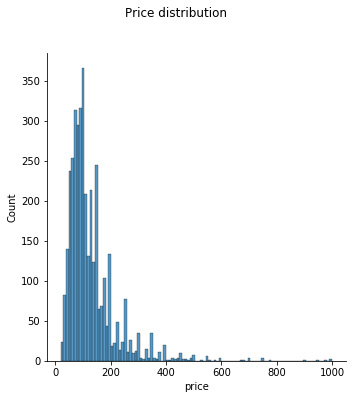

In [5]:
plt.figure(figsize=(16,16))
prices=sns.displot(listings['price'])
prices.fig.suptitle("\n".join(["Price distribution"]), y=1.1)
plt.show()

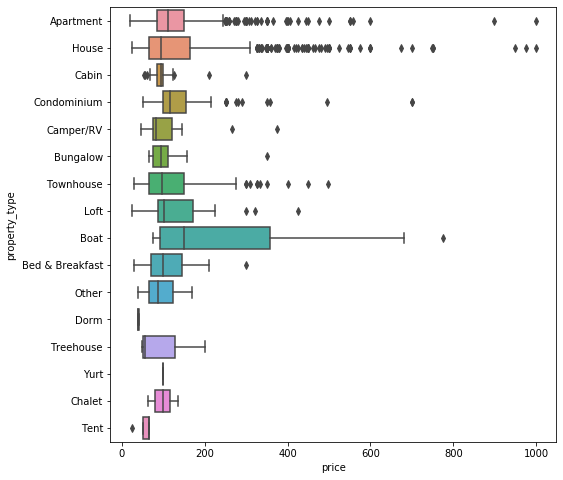

In [6]:
plt.figure(figsize=(8,8))
sns.boxplot(x="price", y="property_type", data=listings)
plt.show()

El tipo de cama en cuartos privados y compartidos, mantiene una distribución similar en cuanto al valor de la renta. Para Entire Home/Apt la Cama Real y el Sofa presentan mayores precios en realción a los otros tipos de cama, adicionalmente el sofa tiene la mayor dispersión en precios.

[]

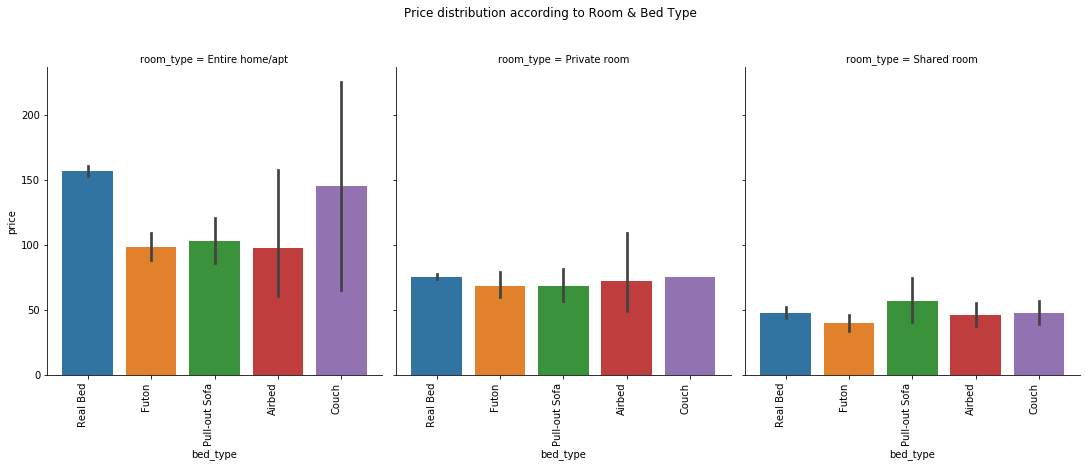

In [7]:
room_bed= sns.catplot(x='bed_type', y='price', col ='room_type', kind= 'bar', data=listings)
room_bed.set_xticklabels(rotation=90, horizontalalignment='right')
room_bed.fig.suptitle("\n".join(["Price distribution according to Room & Bed Type"]), y=1.1)
plt.plot()

### Cuál es el área más costosa?

En los vecindarios de Northgate, Delridge, Rainier Valley, Lake Valley y University District se encuentran los espacios más económicos (promedio 90.54 USD por noche) y con menor dispersión en cuanto a precios (51.48 USD). Mientras que en Magnolia, Queen Anne, Cascade, Capitol Hill y Downtown el precio promedio es de 146.28 USD con una mayor dispersión en precios que se refleja en una desviación estándar de 101.50USD.

In [8]:
price_neigh=pd.pivot_table(data=listings,index=['neighbourhood_group_cleansed', 'zipcode'], values=['price'], aggfunc={'price': [len,min, max, np.mean, np.std, np.median]})
price_neigh.columns =price_neigh.columns.droplevel(0)
price_neigh.sort_values('std', ascending=False)
price_neigh=price_neigh.reset_index()
price_neigh=price_neigh.fillna(0)
price_neigh.head()

,neighbourhood_group_cleansed,zipcode,len,max,mean,median,min,std
0,Ballard,98107,140.0,465.0,128.200000,95.0,25.0,89.050483
1,Ballard,98115,1.0,99.0,99.000000,99.0,99.0,0.000000
2,Ballard,98117,88.0,475.0,118.238636,93.5,35.0,86.567892
3,Beacon Hill,98108,33.0,375.0,88.030303,69.0,35.0,65.171162
4,Beacon Hill,98118,8.0,215.0,98.500000,60.0,45.0,67.639802


In [9]:
cheap=listings[listings['neighbourhood_group_cleansed'].isin(['University District', 'Lake City', 'Rainier Valley', 'Delridge', 'Northgate'])]['price']
expensive=listings[listings['neighbourhood_group_cleansed'].isin(['Magnolia', 'Queen Anne', 'Cascade', 'Capitol Hill', 'Downtown'])]['price']

In [10]:
def mean_aveg(sample):
    return print('El valor promedio por noche es: ', np.mean(sample),' y la desviación estándar es: ', np.std(sample))

In [11]:
mean_aveg(cheap)

El valor promedio por noche es:  90.5483234714004  y la desviación estándar es:  51.48044124250088


In [12]:
mean_aveg(expensive)

El valor promedio por noche es:  146.2833981841764  y la desviación estándar es:  101.50310402374366


Respecto a la mediana de precios por zipcode sobresale el área central de Seattle por tener precios más altos. Hacia los extremos de la ciudad considerablemente desciende el valor.

In [13]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json') as response:
    zip_codes = json.load(response)
price_neigh = price_neigh.rename({'zipcode': 'ZCTA5CE10'}, axis=1)
price_neigh.loc[:, 'ZCTA5CE10'] = price_neigh['ZCTA5CE10'].astype(str)

m = folium.Map(location=[47.6332319,-122.3654769], zoom_start=11, tiles='cartodbpositron')
m.choropleth(geo_data=zip_codes, data=price_neigh,
             columns=['ZCTA5CE10', 'median'],
             key_on='feature.properties.ZCTA5CE10',
             fill_color='BuPu',
             nan_fill_color="white",
             nan_fill_opacity=0,
             fill_opacity=.8,
             line_opacity=0.1,
             legend_name='Median price per night'
)
#m

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
